# 1.滤波
图像滤波是指在尽量保留图像细节特征的条件下对图像的噪声进行抑制，是图像预处理中不可缺少的操作。

## 1.1 均值滤波

均值滤波是指用卷积核窗口下所有像素的均值代替窗口中心值。其优点是将受到噪声影响的像素利用周围的像素值进行修复，但是不能很好地保护图像细节。

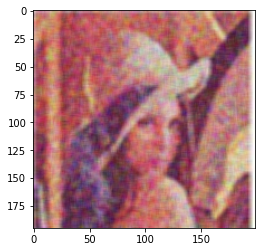

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('../example_images/noise.png')
# 均值滤波
average_filter_img = cv2.blur(img, (5, 5))
# 将bgr转换为rgb
average_filter_img = cv2.cvtColor(average_filter_img, cv2.COLOR_BGR2RGB)
plt.imshow(average_filter_img)

## 1.2 方框滤波
方框滤波相对均值滤波增加一个参数，即采用邻域内像素的均值或者邻域内像素的和。当normalize=True时，等效为均值滤波。

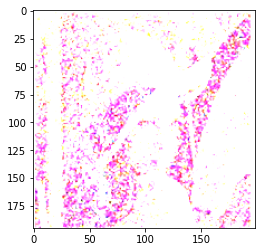

In [27]:
box_filter_img = cv2.boxFilter(img, -1, (2, 2),normalize=False)
box_filter_img = cv2.cvtColor(box_filter_img, cv2.COLOR_BGR2RGB)
plt.imshow(box_filter_img)

## 1.3 高斯滤波
高斯滤波通过二维高斯函数生成卷积核，并利用卷积核计算邻域内的加权像素值代替邻域内的中心值。高斯滤波广泛用于图像的降噪中，但是效率比均值滤波低。

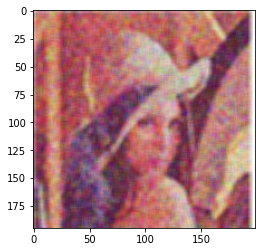

In [8]:
gaussian_filter_img = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=5)
gaussian_filter_img = cv2.cvtColor(gaussian_filter_img, cv2.COLOR_BGR2RGB)
plt.imshow(gaussian_filter_img)

## 1.4 中值滤波
中值滤波是一种常用的非线性滤波方法，用于去除图像中的噪声。与均值滤波和高斯滤波不同，中值滤波以像素周围邻域内像素的中值作为输出值，而不是平均值或加权平均值。

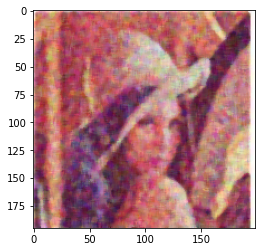

In [11]:
median_filter_img = cv2.medianBlur(img, 5)
median_filter_img = cv2.cvtColor(median_filter_img, cv2.COLOR_BGR2RGB)
plt.imshow(median_filter_img)

## 1.5 双边滤波
双边滤波同时考虑了像素之间空间距离的相似性和灰度值的相似性，可以在降噪的同时很好地保留图像的边缘和细节信息。

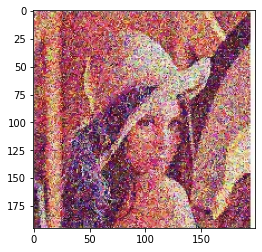

In [13]:
bilater_img = cv2.bilateralFilter(img, 5, 75, 75)
bilater_img = cv2.cvtColor(bilater_img, cv2.COLOR_BGR2RGB)
plt.imshow(bilater_img)

# 2.边缘检测
边缘检测主要用于提取图像中物体的轮廓和边界信息。

## 2.1 Roberts算子
Roberts算子是一种基于差分的边缘检测算子，通过计算像素点在水平和垂直方向上的灰度差异来检测边缘。<br>
Roberts算子使用两个卷积核进行卷积操作，卷积核如下：<br>
$ 
G_{x}= 
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$
<br>
<br>
$
G_{y}=
\begin{bmatrix}
0 & 1 \\
-1 & 0
\end{bmatrix}
$

对应图像上的像素点(x,y)<br><br>
水平方向上的像素差分值可表示为$G_{x}(x,y)=|I(x,y)-I(x+1,y+1)|$ <br><br>
垂直方向上的像素差分值可表示为$G_{y}(x,y)=|I(x,y+1)-I(x+1,y)|$ <br>

最后，将水平方向上和垂直方向上的差分值求平方和再开平方根即梯度的模得到最终的边缘强度值：$G(x,y)=\sqrt{G_{x}(x,y)^{2}+G_{y}(x,y)^{2}}$

边缘强度G(x,y)数值越大，表示该位置的像素点越可能是图像边缘，通过设定一个阈值来划分出边缘和非边缘的像素。Roberts算子具有简单且高效的计算过程，但是对于噪声敏感，边缘检测的结果比较粗糙。

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

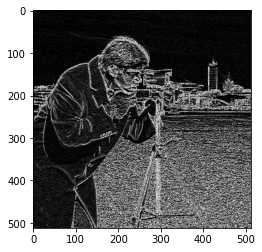

In [16]:
from skimage import data

img = data.camera()

# x方向上卷积核
g_x = np.array([[1,0],[0,-1]],dtype=np.float32)
# y方向上卷积核
g_y = np.array([[0, 1],[-1, 0]],dtype=np.float32)

edges_x = cv2.filter2D(img, -1, g_x)
edges_y = cv2.filter2D(img, -1, g_y)

# 边缘强度
edges = np.sqrt(edges_x**2 + edges_y**2).astype(np.uint8)

# 展示图片
plt.imshow(edges, 'gray')

## 2.2 Sobel算子

Sobel算子边缘强度的计算原理与Roberts算子类似，只需要把水平方向和垂直方向上的卷积核替换为下述即可。<br>
$
G_{x}=\begin{bmatrix}
-1 &0 &1 \\
-2 &0 &2 \\
-1 &0 &1
\end {bmatrix}
$

$
G_{y}=\begin{bmatrix}
-1 &-2 &-1 \\
0 &0 &0 \\
1 &2 &1
\end {bmatrix}
$

dst = cv2.Sobel(src,ddepth,dx,dy,ksize)
* src:输入图像;
* ddepth:输出图像的数据类型;

    * cv2.CV_8U：无符号8位整数（0-255）
    * cv2.CV_16U：无符号16位整数（0-65535）
    * cv2.CV_16S：有符号16位整数
    * cv2.CV_32F：单精度浮点数
    * cv2.CV_64F：双精度浮点数

* dx、dy:水平和垂直方向;
* ksize:Sobel算子卷积核大小

<IPython.core.display.Javascript object>

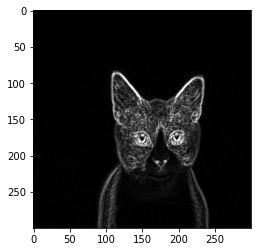

In [15]:
import cv2

img = cv2.imread('../example_images/cat.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (300, 300))

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, 3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, 3)

sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

sobel_xy = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
plt.imshow(sobel_xy, 'gray')

## 2.3 Scharr算子

Scharr算子是一种与Sobel算子类似的图像边缘检测算子，用于检测图像中的一阶导数。它可以帮助我们找到图像中的边缘和纹理等特征。Scharr算子主要用于计算图像在水平和垂直方向上的梯度。相比于Sobel算子，Scharr算子的卷积核具有更好的旋转不变性和更好的抗噪声能力。

scharr卷积核如下<br>

$
G_{x}=\begin{bmatrix}
-3 &0 &3  \\
-10 &0 &10 \\
-3 &0 &3
\end{bmatrix}
$

$
G_{y}=\begin{bmatrix}
-3 &-10 &-3  \\
0 &0 &10 \\
3 &10 &3
\end{bmatrix}
$

<IPython.core.display.Javascript object>

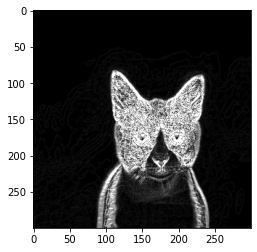

In [25]:
import cv2

img = cv2.imread('../example_images/cat.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (300, 300))

scharr_x = cv2.Scharr(img, cv2.CV_64F, 1, 0, 3)
scharr_y = cv2.Scharr(img, cv2.CV_64F, 0, 1, 3)

scharr_x = cv2.convertScaleAbs(scharr_x)
scharr_y = cv2.convertScaleAbs(scharr_y)

scharr_xy = cv2.addWeighted(scharr_x, 0.5, scharr_y, 0.5, 0)
plt.imshow(scharr_xy, 'gray')

## 2.4 Laplacian算子

Laplacian算子对图像进行了二次微分，因此它对于图像中的高频细节（如边缘）非常敏感。输出图像中的正值表示亮度增加，负值表示亮度减少，而接近零的值表示相对均匀的区域。需要注意的是，Laplacian算子可能对噪声敏感，因此在实际应用中常常结合阈值化等后处理步骤来增强边缘，并过滤掉不重要的细节和噪声。Laplacian算子可以用于边缘检测、纹理增强、图像锐化等任务，帮助我们突出显示图像中的特定特征。

laplacian卷积核如下<br>

$
\begin{bmatrix}
0 &1 &0 \\
1 &-4 &1 \\
0 &1 &0 
\end{bmatrix}
$

<IPython.core.display.Javascript object>

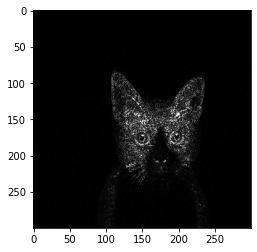

In [18]:
import cv2

img = cv2.imread('../example_images/cat.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (300, 300))

laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
plt.imshow(laplacian, 'gray')

## 2.5 Canny边缘检测

Canny边缘检测算法可以帮助我们提取图像中明显的边缘信息，并且能够有效地抑制噪声和细化边缘。在实际应用中，可以根据具体需求调整滤波器大小、阈值和边缘连接方法等参数来优化边缘检测结果。

1. 使用高斯滤波器,以平滑图像,滤除噪声;
2. 使用Sobel算子计算图像的一阶水平和垂直方向的梯度。根据梯度的大小和方向，得到像素点的梯度强度和梯度方向;
3. 在梯度方向上进行非极大值抑制，以细化边缘，保留具有最大梯度值的像素点;
4. 双阈值检测：定义两个阈值，一个高阈值和一个低阈值。将像素点的梯度强度与两个阈值进行比较。如果梯度强度高于高阈值，则被视为强边缘；如果梯度强度介于低阈值和高阈值之间，则被视为弱边缘；如果梯度强度低于低阈值，则被视为非边缘;
5. 边缘连接：通过链接强边缘和与之相邻的弱边缘，形成闭合的边缘轮廓。.

<IPython.core.display.Javascript object>

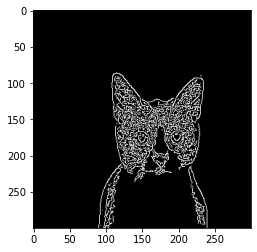

In [32]:
import cv2

img = cv2.imread('../example_images/cat.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (300, 300))

canny = cv2.Canny(img, 20, 100)
plt.imshow(canny, 'gray')